In [1]:
!sudo apt-get install aria2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libaria2-0 libc-ares2
The following NEW packages will be installed:
  aria2 libaria2-0 libc-ares2
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,513 kB of archives.
After this operation, 5,441 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libc-ares2 amd64 1.18.1-1ubuntu0.22.04.3 [45.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libaria2-0 amd64 1.36.0-1 [1,086 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 aria2 amd64 1.36.0-1 [381 kB]
Fetched 1,513 kB in 1s (1,868 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 3.)
debconf: falling back to front

In [2]:
# Download Miniconda and install it
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh -O miniconda.sh
!chmod +x miniconda.sh
!bash ./miniconda.sh -b -f -p /usr/local

--2024-05-10 23:09:10--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143351488 (137M) [application/octet-stream]
Saving to: ‘miniconda.sh’

miniconda.sh        100%[===================>] 136.71M  75.4MB/s    in 1.8s    

2024-05-10 23:09:12 (75.4 MB/s) - ‘miniconda.sh’ saved [143351488/143351488]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of pack

In [46]:
# Initialize Conda shell hook
!eval "$(conda shell.bash hook)" && conda init

no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.12/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
no change     /root/.bashrc
No action taken.


In [4]:
# Clone required repositories
!git clone https://github.com/relmelegy/Sketch-to-Video.git
%cd Sketch-to-Video/
!git clone https://github.com/alibaba/animate-anything.git
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git

Cloning into 'Sketch-to-Video'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 96 (delta 4), reused 1 (delta 1), pack-reused 91
Receiving objects: 100% (96/96), 29.22 MiB | 29.25 MiB/s, done.
Resolving deltas: 100% (17/17), done.
/content/Sketch-to-Video
fatal: destination path 'animate-anything' already exists and is not an empty directory.
Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 2516 (delta 0), reused 1 (delta 0), pack-reused 2513
Receiving objects: 100% (2516/2516), 8.20 MiB | 15.41 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.


In [5]:
# Install Python environments
!conda create -y -n pix-to-pix python=3.10
!conda create -y -n animation python=3.10

Channels:
 - defaults
Platform: linux-64
Solving environment: | done

## Package Plan ##

  environment location: /usr/local/envs/pix-to-pix

  added / updated specs:
    - python=3.10


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bzip2-1.0.8                |       h5eee18b_6         262 KB
    libffi-3.4.4               |       h6a678d5_1         141 KB
    openssl-3.0.13             |       h7f8727e_1         5.2 MB
    pip-24.0                   |  py310h06a4308_0         2.7 MB
    python-3.10.14             |       h955ad1f_1        26.8 MB
    setuptools-69.5.1          |  py310h06a4308_0        1012 KB
    sqlite-3.45.3              |       h5eee18b_0         1.2 MB
    tk-8.6.14                  |       h39e8969_0         3.4 MB
    wheel-0.43.0               |  py310h06a4308_0         110 KB
    xz-5.4.6                   |       h5eee18b_1         643 KB
    zlib-1.2.13  

In [6]:
# Install dependencies for pix2pix
%%shell
eval "$(conda shell.bash hook)"
conda activate pix-to-pix
cd /content/Sketch-to-Video/pytorch-CycleGAN-and-pix2pix
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.7 MB/s eta 0:00:00
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [62]:
!ls datasets/edges2shoes/

test  train  val


In [64]:
# Download datasets and models
!bash pytorch-CycleGAN-and-pix2pix/datasets/download_pix2pix_dataset.sh edges2shoes
!bash pytorch-CycleGAN-and-pix2pix/scripts/download_pix2pix_model.sh edges2shoes

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [edges2shoes]
for details.

--2024-05-11 02:01:39--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/edges2shoes.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704688 (208M)
Saving to: ‘./checkpoints/edges2shoes_pretrained/latest_net_G.pth’

./checkpoints/edges 100%[===================>] 207.62M  67.5MB/s    in 3.1s    

2024-05-11 02:01:42 (67.5 MB/s) - ‘./checkpoints/edges2shoes_pretrained/latest_net_G.pth’ saved [217704688/217704688]



In [47]:
# Install dependencies for Animate-Anything
%%shell
eval "$(conda shell.bash hook)"
conda activate animation
cd animate-anything
pip install -r requirements.txt
mkdir -p output/latent
cd output/latent
wget https://cloudbook-public-production.oss-cn-shanghai.aliyuncs.com/animation/animate_anything_512_v1.02.tar
tar -xvf animate_anything_512_v1.02.tar

Saving dog.jpeg to dog (1).jpeg


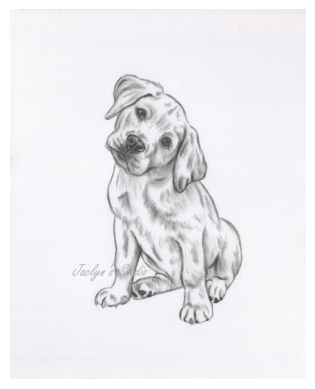

In [48]:
from google.colab import files
import os
import matplotlib.pyplot as plt

# Upload a sketch from your computer
uploaded = files.upload()

# Assuming a single file is uploaded
sketch_filename = next(iter(uploaded))

# Create the dataset structure for pix2pix
os.makedirs('./datasets/edges2shoes/test', exist_ok=True)

# Save the uploaded sketch in the test directory (simulating a paired dataset)
sketch_path = f'./datasets/edges2shoes/test/{sketch_filename}'
with open(sketch_path, 'wb') as f:
    f.write(uploaded[sketch_filename])

# Display the uploaded sketch
img = plt.imread(sketch_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [76]:
!ls checkpoints/edges2shoes_pretrained

latest_net_G.pth  test_opt.txt


In [78]:
# Step 2: Generate Image from Sketch using pix2pix
%%shell
eval "$(conda shell.bash hook)"
conda activate pix-to-pix
cd pytorch-CycleGAN-and-pix2pix
cd /content/Sketch-to-Video/pytorch-CycleGAN-and-pix2pix

# set -ex
python test.py --dataroot '/content/Sketch-to-Video/datasets/edges2shoes' --name edges2shoes_pretrained --model test --netG unet_256 --direction BtoA --dataset_mode single --norm batch --checkpoints_dir /content/Sketch-to-Video/checkpoints/
# python test.py --dataroot ./Sketch-to-Video/datasets/facades --direction BtoA --model pix2pix --name facades_label2photo_pretrained --use_wandb
# python test.py --dataroot /content/Sketch-to-Video/datasets/edges2shoes --direction BtoA --model pix2pix --name edges2shoes_pretrained --checkpoints_dir /content/Sketch-to-Video/checkpoints --use_wandb

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/Sketch-to-Video/checkpoints/	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: /content/Sketch-to-Video/datasets/edges2shoes	[default: None]
             dataset_mode: single                        
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default:

In [ ]:
!ls pytorch-CycleGAN-and-pix2pix/results/edges2shoes_pretrained/test_latest/images/

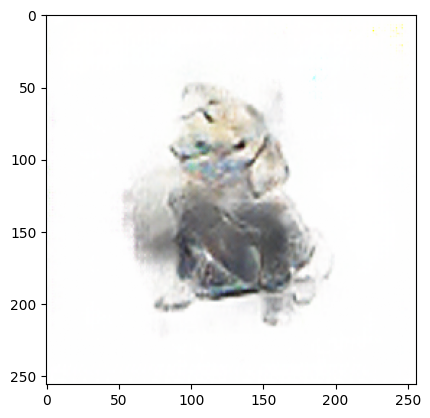

In [91]:
# Example visualization of results
import matplotlib.pyplot as plt

img = plt.imread('/content/Sketch-to-Video/pytorch-CycleGAN-and-pix2pix/results/edges2shoes_pretrained/test_latest/images/dog_fake.png')
plt.imshow(img)

In [94]:
# !pip install omegaconf

  Using cached omegaconf-2.3.0-py3-none-any.whl.metadata (3.9 kB)
  Using cached antlr4-python3-runtime-4.9.3.tar.gz (117 kB)
  Preparing metadata (setup.py) ... done
Using cached omegaconf-2.3.0-py3-none-any.whl (79 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.0/725.0 kB 12.5 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=90fd36f4ff78c931249cc639f46517879007b9f94fc5cacf9fcce7316bb93afb
  Stored in directory: /root/.cache/pip/wheels/1f/be/48/13754633f1d08d1fbfc60d5e80ae1e5d7329500477685286cd
Successfully built antlr4-python3-runtime


In [ ]:
%%shell
eval "$(conda shell.bash hook)"
conda activate animation
cd /content/Sketch-to-Video/animate-anything
pip install -r requirements.txt

In [100]:
# Step 3: Animate Generated Image using Animate-Anything
%%shell
eval "$(conda shell.bash hook)"
conda activate animation
cd /content/Sketch-to-Video/animate-anything

# Asking user to input prompt interactively
prompt_image='/content/Sketch-to-Video/pytorch-CycleGAN-and-pix2pix/results/edges2shoes_pretrained/test_latest/images/dog_fake.png'
read -p "Enter the prompt: " user_prompt

python train.py --config output/latent/animate_anything_512_v1.02/config.yaml --eval \
    validation_data.prompt_image=$prompt_image \
    validation_data.prompt="$user_prompt"

Enter the prompt: a dog barking
motion mask True, motion_strength True
33 Attention layers using Scaled Dot Product Attention.
Loading pipeline components...: 100% 5/5 [00:00<00:00, 72.14it/s]
/usr/local/envs/animation/lib/python3.10/site-packages/diffusers/pipelines/text_to_video_synthesis/pipeline_text_to_video_synth.py:168: FutureWarning: `_encode_prompt()` is deprecated and it will be removed in a future version. Use `encode_prompt()` instead. Also, be aware that the output format changed from a concatenated tensor to a tuple.
  deprecate("_encode_prompt()", "1.0.0", deprecation_message, standard_warn=False)
  4% 1/25 [00:03<01:15,  3.16s/it]/content/Sketch-to-Video/animate-anything/models/pipeline.py:168: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  motion = torch.tensor(motion, device=device)
100% 25/25 [01:21<00:00,  3.27s/it]
s

In [101]:
!zip -r demo.zip /content/Sketch-to-Video/animate-anything/output/demo

  adding: content/Sketch-to-Video/animate-anything/output/demo/ (stored 0%)
  adding: content/Sketch-to-Video/animate-anything/output/demo/dog_fake/ (stored 0%)
  adding: content/Sketch-to-Video/animate-anything/output/demo/dog_fake/0..mp4 (deflated 1%)
  adding: content/Sketch-to-Video/animate-anything/output/demo/dog_fake/2..mp4 (deflated 1%)
  adding: content/Sketch-to-Video/animate-anything/output/demo/dog_fake/3_mask.jpg (deflated 90%)
  adding: content/Sketch-to-Video/animate-anything/output/demo/dog_fake/3.gif (deflated 1%)
  adding: content/Sketch-to-Video/animate-anything/output/demo/dog_fake/0.gif (deflated 1%)
  adding: content/Sketch-to-Video/animate-anything/output/demo/dog_fake/4..mp4 (deflated 1%)
  adding: content/Sketch-to-Video/animate-anything/output/demo/dog_fake/3..mp4 (deflated 1%)
  adding: content/Sketch-to-Video/animate-anything/output/demo/dog_fake/4.gif (deflated 1%)
  adding: content/Sketch-to-Video/animate-anything/output/demo/dog_fake/2.gif (deflated 1%)
 

In [105]:
from google.colab import files

files.download('/content/Sketch-to-Video/demo.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>